In [134]:
import pandas as pd
import numpy as np
import os
import csv

In [135]:
df1 = pd.read_csv(r'all_2021宜蘭_weather_file.csv')
df2 = pd.read_csv(r'all_2022宜蘭_weather_file.csv')

print(df1.shape)
print(df2.shape)

(365, 46)
(365, 46)


In [136]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   觀測時間(day)           365 non-null    int64  
 1   測站氣壓(hPa)           365 non-null    float64
 2   海平面氣壓(hPa)          365 non-null    float64
 3   測站最高氣壓(hPa)         365 non-null    float64
 4   測站最高氣壓時間(LST)       365 non-null    object 
 5   測站最低氣壓(hPa)         365 non-null    float64
 6   測站最低氣壓時間(LST)       365 non-null    object 
 7   氣溫(℃)               365 non-null    float64
 8   最高氣溫(℃)             365 non-null    float64
 9   最高氣溫時間(LST)         365 non-null    object 
 10  最低氣溫(℃)             365 non-null    float64
 11  最低氣溫時間(LST)         365 non-null    object 
 12  露點溫度(℃)             365 non-null    float64
 13  相對溼度(%)             365 non-null    int64  
 14  最小相對溼度(%)           365 non-null    int64  
 15  最小相對溼度時間(LST)       365 non-null    object 
 16  風速(m/s) 

In [137]:
df1.head(4)

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,地溫5cm,地溫10cm,地溫20cm,地溫30cm,地溫50cm,地溫100cm,觀測站,年份,月,day_of_year
0,1,1024.6,1025.6,1027.3,2021/01/01 00:01:00,1022.0,2021/01/01 14:52:00,12.3,14.7,2021/01/01 14:05:00,...,13.6,14.1,16.0,14.9,16.9,19.8,宜蘭縣,2021,1,1
1,2,1023.6,1024.6,1025.0,2021/01/02 09:14:00,1022.4,2021/01/02 14:00:00,13.1,13.7,2021/01/02 08:00:00,...,14.4,14.7,16.0,15.2,16.6,19.4,宜蘭縣,2021,1,2
2,3,1022.1,1023.1,1024.2,2021/01/03 07:21:00,1020.0,2021/01/03 14:03:00,16.4,20.3,2021/01/03 11:44:00,...,15.8,15.8,16.2,15.8,16.6,19.2,宜蘭縣,2021,1,3
3,4,1019.2,1020.2,1021.9,2021/01/04 09:08:00,1016.8,2021/01/04 23:52:00,17.9,21.8,2021/01/04 13:52:00,...,17.1,17.0,17.1,16.9,17.0,19.0,宜蘭縣,2021,1,4


In [138]:
string_columns = []
for col in df1:
        if(df1[col].dtypes=='object'):
            string_columns.append(col)
print(string_columns)

['測站最高氣壓時間(LST)', '測站最低氣壓時間(LST)', '最高氣溫時間(LST)', '最低氣溫時間(LST)', '最小相對溼度時間(LST)', '最大瞬間風風速時間(LST)', '降水量(mm)', '最大十分鐘降水量(mm)', '最大十分鐘降水量起始時間(LST)', '最大六十分鐘降水量(mm)', '最大六十分鐘降水量起始時間(LST)', 'A型蒸發量(mm)', '日最高紫外線指數時間(LST)', '觀測站']


# 處理降水量資料 (mm) "T" means 降水量 < 0.1 mm "X" means the device have some problem

In [139]:
df1['降水量(mm)']

0        T
1      0.5
2        T
3      0.5
4      0.5
      ... 
360    6.5
361    1.5
362    0.0
363    0.0
364    0.5
Name: 降水量(mm), Length: 365, dtype: object

In [140]:
df1['降水量(mm)'].unique()

array(['T', '0.5', '18.5', '2.5', '0.0', '8.5', '3.0', '4.5', '1.0',
       '10.5', '34.0', '6.5', '1.5', '8.0', '5.0', 'X', '16.5', '2.0',
       '15.5', '12.5', '17.5', '7.5', '10.0', '87.0', '34.5', '36.0',
       '28.0', '14.5', '12.0', '63.5', '22.0', '33.5', '62.5', '50.0',
       '24.5', '49.5', '6.0', '30.5', '3.5', '4.0', '27.5', '69.0', '5.5',
       '67.0', '23.0', '20.5', '48.5', '18.0', '147.0', '54.5', '15.0',
       '41.0', '11.0', '11.5', '9.0', '17.0', '69.5', '65.0', '37.5'],
      dtype=object)

In [141]:
def fix_rainfall_data(df):
    df['降水量(mm)'] = df['降水量(mm)'].replace('T', '0.0')
    df['降水量(mm)'] = df['降水量(mm)'].replace('X', '-1')
    df['降水量(mm)'] = pd.to_numeric(df['降水量(mm)'])
    return df

fix_rainfall_data(df1)['降水量(mm)']
fix_rainfall_data(df2) 

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,地溫5cm,地溫10cm,地溫20cm,地溫30cm,地溫50cm,地溫100cm,觀測站,年份,月,day_of_year
0,1,1023.7,1024.7,1026.2,2022/01/01 00:01:00,1021.4,2022/01/01 14:31:00,17.3,21.0,2022/01/01 11:21:00,...,17.3,17.3,18.2,17.2,18.1,20.7,宜蘭縣,2022,1,1
1,2,1023.0,1024.0,1024.8,2022/01/02 08:54:00,1021.6,2022/01/02 14:36:00,16.5,19.5,2022/01/02 11:58:00,...,17.3,17.4,18.4,17.5,18.3,20.5,宜蘭縣,2022,1,2
2,3,1021.5,1022.5,1023.1,2022/01/03 08:16:00,1019.7,2022/01/03 14:29:00,18.4,22.2,2022/01/03 11:59:00,...,18.1,18.0,18.5,17.8,18.2,20.5,宜蘭縣,2022,1,3
3,4,1020.3,1021.3,1022.8,2022/01/04 09:09:00,1018.2,2022/01/04 23:50:00,17.9,19.5,2022/01/04 14:22:00,...,18.5,18.5,18.9,18.3,18.5,20.4,宜蘭縣,2022,1,4
4,5,1016.4,1017.3,1018.2,2022/01/05 00:01:00,1014.2,2022/01/05 14:34:00,19.6,23.9,2022/01/05 15:10:00,...,18.8,18.7,19.1,18.5,18.6,20.5,宜蘭縣,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27,1024.1,1025.1,1025.7,2022/12/27 09:21:00,1023.0,2022/12/27 14:27:00,15.5,17.2,2022/12/27 10:54:00,...,15.3,15.3,16.2,15.2,16.1,19.0,宜蘭縣,2022,12,361
361,28,1023.9,1024.9,1025.8,2022/12/28 21:05:00,1021.9,2022/12/28 14:07:00,15.4,16.5,2022/12/28 11:26:00,...,15.7,15.7,16.3,15.4,16.1,19.0,宜蘭縣,2022,12,362
362,29,1024.4,1025.4,1025.7,2022/12/29 09:12:00,1022.7,2022/12/29 14:36:00,15.7,16.6,2022/12/29 12:52:00,...,16.0,15.9,16.4,15.6,16.2,18.9,宜蘭縣,2022,12,363
363,30,1024.9,1025.9,1026.5,2022/12/30 20:30:00,1022.4,2022/12/30 14:14:00,16.4,17.7,2022/12/30 12:21:00,...,16.6,16.4,16.7,16.0,16.3,18.8,宜蘭縣,2022,12,364


In [142]:
df2['降水量(mm)'].unique()

array([  0. ,   7.5,   3.5,   6.5,   2. ,   3. ,  12. ,  33.5,  26. ,
        39. ,  69. , 115. ,   1. ,   5.5,  14. ,  11. ,   0.5,   7. ,
         1.5,  19.5,   6. ,  13.5,   8. ,   4. ,  33. ,  62. ,  10.5,
        22.5,  89.5,  22. ,   9. ,  10. ,  17. ,  36. ,  16.5,  17.5,
         5. ,   9.5,  18. ,   4.5,  25.5,  25. ,  27.5,  46.5,  23.5,
        36.5,  55. ,  18.5,  13. ,   2.5,  20.5,  35. ,  55.5,  24.5,
        73.5,  59. ,  45. ,  38.5,  11.5,   8.5,  31. ,  95. ,  97.5,
        28.5, 127. ,  65. ,  43. ,  52.5,  12.5, 121. ,  15.5, 105. ,
        30.5,  44.5,  49. ,  69.5])

# 處理 other rainfall data 

In [143]:
string_columns = []
for col in df1:
        if(df1[col].dtypes=='object'):
            string_columns.append(col)
print(string_columns)

['測站最高氣壓時間(LST)', '測站最低氣壓時間(LST)', '最高氣溫時間(LST)', '最低氣溫時間(LST)', '最小相對溼度時間(LST)', '最大瞬間風風速時間(LST)', '最大十分鐘降水量(mm)', '最大十分鐘降水量起始時間(LST)', '最大六十分鐘降水量(mm)', '最大六十分鐘降水量起始時間(LST)', 'A型蒸發量(mm)', '日最高紫外線指數時間(LST)', '觀測站']


In [144]:
print(df1['最大十分鐘降水量(mm)'].unique())

['T' '0.5' '2.5' '0.0' '3.0' '1.5' '1.0' '2.0' '3.5' 'X' '11.0' '9.0'
 '7.5' '4.5' '7.0' '5.5' '10.0' '5.0' '4.0' '19.0' '6.5' '11.5' '21.0'
 '10.5' '6.0']


In [145]:
print(df1['最大六十分鐘降水量(mm)'].unique())

['T' '0.5' '3.5' '1.0' '0.0' '1.5' '4.5' '6.5' '2.0' '4.0' '2.5' '6.0'
 '3.0' '7.0' 'X' '7.5' '17.5' '8.0' '31.5' '9.5' '24.5' '14.0' '19.5'
 '9.0' '16.5' '13.5' '10.0' '33.0' '25.0' '5.5' '54.5' '22.0' '31.0' '5.0'
 '38.5' '16.0' '20.0' '20.5' '13.0' '11.0' '12.0' '8.5']


In [146]:
print(df1['A型蒸發量(mm)'].unique())

['-0.3' '-0.2' '-0.9' '-0.1' '0.9' '0.3' '2.3' '3.5' '-1.1' '-2.5' '-0.8'
 '-0.7' '-0.4' '-3.4' '-1.6' '-1.2' '-2.2' '2.5' '1.8' '3.6' '-0.5' '1.7'
 '-1.8' '-3.5' '-2.0' '-1.9' '1.3' '-2.4' '-4.0' '-1.5' '1.5' '3.2' '2.4'
 '4.0' '3.0' '-2.3' '2.0' '1.0' '-0.6' '-1.0' '-1.4' '3.3' '-2.6' '-2.1'
 '0.4' '3.7' '2.9' '-3.9' '4.4' '-4.2' '4.1' '4.5' '1.2' '4.3' '-2.8'
 '5.0' '2.2' '5.8' '-3.7' '1.1' '-3.8' '-1.7' '3.9' '4.9' '3.8' '5.3'
 '6.1' '-6.0' '-4.9' '5.4' '6.2' '6.4' '-3.2' '-4.6' '5.1' '5.5' '-5.3'
 '-7.1' '/' '-3.0' '5.7' '-1.3' '-5.1' '6.3' '-4.7' '3.1' '6.5' '7.2'
 '-3.6' '-2.7' '4.6' '6.0' '6.8' '7.0' '7.7' '7.1' '7.5' '-6.1' '6.6'
 '-5.6' '-3.3' '-4.1' '5.2' '-4.3' '-2.9' '-4.8' '4.8' '-5.2' '-4.4'
 '-5.4' '1.4' '2.6' '3.4' '0.5' '1.6' '2.1']


In [147]:
print(df2['A型蒸發量(mm)'].unique())

['0.9' '-0.3' '-0.8' '-0.1' '-0.9' '0.4' '-0.7' '-0.6' '1.4' '1.1' '1.3'
 '-1.7' '-0.4' '-0.2' '/' '-2.5' '-1.9' '-1.2' '-1.0' '-1.1' '-2.2' '-2.3'
 '-2.0' '-0.5' '-1.6' '-2.1' '2.6' '4.1' '-3.5' '-1.4' '3.3' '4.6' '3.4'
 '3.5' '1.8' '3.2' '-2.6' '3.8' '-1.8' '-1.5' '2.4' '-3.3' '-5.0' '-3.9'
 '0.7' '2.2' '-4.5' '2.7' '-4.2' '5.7' '-2.9' '4.3' '3.1' '-1.3' '-4.1'
 '1.9' '4.2' '-2.4' '-3.1' '-2.8' '5.5' '1.5' '5.0' '4.4' '-4.6' '5.8'
 '-3.7' '4.5' '4.9' '-4.9' '6.1' '7.2' '7.3' '6.3' '-5.2' '6.0' '6.5'
 '6.9' '6.4' '4.0' '-6.0' '6.6' '7.6' '7.0' '5.4' '5.9' '-6.8' '5.2' '7.7'
 '5.1' '6.2' '5.3' '6.8' '5.6' '-4.4' '-5.9' '-3.4' '4.7' '-3.8' '-3.6'
 '2.8' '1.6' '2.0' '2.9' '2.3']


In [148]:
def Max_10_mintes_fix_rainfall_data(df):
    df['最大十分鐘降水量(mm)'] = df['最大十分鐘降水量(mm)'].replace('T', '0.0')
    df['最大十分鐘降水量(mm)'] = df['最大十分鐘降水量(mm)'].replace('X', '-1')
    df['最大十分鐘降水量(mm)'] = pd.to_numeric(df['最大十分鐘降水量(mm)'])
    return df

def Max_60_mintes_fix_rainfall_data(df):
    df['最大六十分鐘降水量(mm)'] = df['最大六十分鐘降水量(mm)'].replace('T', '0.0')
    df['最大六十分鐘降水量(mm)'] = df['最大六十分鐘降水量(mm)'].replace('X', '-1')
    df['最大六十分鐘降水量(mm)'] = pd.to_numeric(df['最大六十分鐘降水量(mm)'])
    return df

def A_type_evaporation(df):
    df['A型蒸發量(mm)'] = df['A型蒸發量(mm)'].replace('/', '-1')
    df['A型蒸發量(mm)'] = pd.to_numeric(df['A型蒸發量(mm)'])
    return df

Max_10_mintes_fix_rainfall_data(df1)
Max_10_mintes_fix_rainfall_data(df2) 

Max_60_mintes_fix_rainfall_data(df1)
Max_60_mintes_fix_rainfall_data(df2) 

A_type_evaporation(df1)
A_type_evaporation(df2)

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,地溫5cm,地溫10cm,地溫20cm,地溫30cm,地溫50cm,地溫100cm,觀測站,年份,月,day_of_year
0,1,1023.7,1024.7,1026.2,2022/01/01 00:01:00,1021.4,2022/01/01 14:31:00,17.3,21.0,2022/01/01 11:21:00,...,17.3,17.3,18.2,17.2,18.1,20.7,宜蘭縣,2022,1,1
1,2,1023.0,1024.0,1024.8,2022/01/02 08:54:00,1021.6,2022/01/02 14:36:00,16.5,19.5,2022/01/02 11:58:00,...,17.3,17.4,18.4,17.5,18.3,20.5,宜蘭縣,2022,1,2
2,3,1021.5,1022.5,1023.1,2022/01/03 08:16:00,1019.7,2022/01/03 14:29:00,18.4,22.2,2022/01/03 11:59:00,...,18.1,18.0,18.5,17.8,18.2,20.5,宜蘭縣,2022,1,3
3,4,1020.3,1021.3,1022.8,2022/01/04 09:09:00,1018.2,2022/01/04 23:50:00,17.9,19.5,2022/01/04 14:22:00,...,18.5,18.5,18.9,18.3,18.5,20.4,宜蘭縣,2022,1,4
4,5,1016.4,1017.3,1018.2,2022/01/05 00:01:00,1014.2,2022/01/05 14:34:00,19.6,23.9,2022/01/05 15:10:00,...,18.8,18.7,19.1,18.5,18.6,20.5,宜蘭縣,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27,1024.1,1025.1,1025.7,2022/12/27 09:21:00,1023.0,2022/12/27 14:27:00,15.5,17.2,2022/12/27 10:54:00,...,15.3,15.3,16.2,15.2,16.1,19.0,宜蘭縣,2022,12,361
361,28,1023.9,1024.9,1025.8,2022/12/28 21:05:00,1021.9,2022/12/28 14:07:00,15.4,16.5,2022/12/28 11:26:00,...,15.7,15.7,16.3,15.4,16.1,19.0,宜蘭縣,2022,12,362
362,29,1024.4,1025.4,1025.7,2022/12/29 09:12:00,1022.7,2022/12/29 14:36:00,15.7,16.6,2022/12/29 12:52:00,...,16.0,15.9,16.4,15.6,16.2,18.9,宜蘭縣,2022,12,363
363,30,1024.9,1025.9,1026.5,2022/12/30 20:30:00,1022.4,2022/12/30 14:14:00,16.4,17.7,2022/12/30 12:21:00,...,16.6,16.4,16.7,16.0,16.3,18.8,宜蘭縣,2022,12,364


In [149]:
string_columns = []
for col in df1:
        if(df1[col].dtypes=='object'):
            string_columns.append(col)
print(string_columns)

['測站最高氣壓時間(LST)', '測站最低氣壓時間(LST)', '最高氣溫時間(LST)', '最低氣溫時間(LST)', '最小相對溼度時間(LST)', '最大瞬間風風速時間(LST)', '最大十分鐘降水量起始時間(LST)', '最大六十分鐘降水量起始時間(LST)', '日最高紫外線指數時間(LST)', '觀測站']


In [150]:
df1.drop(labels=string_columns,axis='columns',inplace=True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   觀測時間(day)           365 non-null    int64  
 1   測站氣壓(hPa)           365 non-null    float64
 2   海平面氣壓(hPa)          365 non-null    float64
 3   測站最高氣壓(hPa)         365 non-null    float64
 4   測站最低氣壓(hPa)         365 non-null    float64
 5   氣溫(℃)               365 non-null    float64
 6   最高氣溫(℃)             365 non-null    float64
 7   最低氣溫(℃)             365 non-null    float64
 8   露點溫度(℃)             365 non-null    float64
 9   相對溼度(%)             365 non-null    int64  
 10  最小相對溼度(%)           365 non-null    int64  
 11  風速(m/s)             365 non-null    float64
 12  風向(360degree)       365 non-null    int64  
 13  最大瞬間風(m/s)          365 non-null    float64
 14  最大瞬間風風向(360degree)  365 non-null    int64  
 15  降水量(mm)             365 non-null    float64
 16  降水時數(hou

In [151]:
df2.drop(labels=string_columns,axis='columns',inplace=True)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   觀測時間(day)           365 non-null    int64  
 1   測站氣壓(hPa)           365 non-null    float64
 2   海平面氣壓(hPa)          365 non-null    float64
 3   測站最高氣壓(hPa)         365 non-null    float64
 4   測站最低氣壓(hPa)         365 non-null    float64
 5   氣溫(℃)               365 non-null    float64
 6   最高氣溫(℃)             365 non-null    float64
 7   最低氣溫(℃)             365 non-null    float64
 8   露點溫度(℃)             365 non-null    float64
 9   相對溼度(%)             365 non-null    int64  
 10  最小相對溼度(%)           365 non-null    int64  
 11  風速(m/s)             365 non-null    float64
 12  風向(360degree)       365 non-null    int64  
 13  最大瞬間風(m/s)          365 non-null    float64
 14  最大瞬間風風向(360degree)  365 non-null    int64  
 15  降水量(mm)             365 non-null    float64
 16  降水時數(hou

In [152]:
print(df1.shape)
print(df2.shape)

(365, 36)
(365, 36)


# 加入高麗菜資料

In [153]:
df1_cabbage = pd.read_csv(r'Train_2021_高麗菜_data_file.csv')
df2_cabbage = pd.read_csv(r'Train_2022_高麗菜_data_file.csv')

In [154]:
df1_cabbage.info

<bound method DataFrame.info of             日期       市場          產品    上價    中價    下價  平均價(元/公斤)    增減%  \
0    110/01/01  109 台北一  LA1 甘藍 初秋   35.1  27.5  18.4       27.2   -  1   
1    110/01/02  109 台北一  LA1 甘藍 初秋   33.4  26.0  14.2       25.1   -  8   
2    110/01/03  109 台北一  LA1 甘藍 初秋   34.9  28.3  19.8       27.9   + 11   
3    110/01/05  109 台北一  LA1 甘藍 初秋   31.4  23.4  17.0       23.7   - 15   
4    110/01/06  109 台北一  LA1 甘藍 初秋   33.6  26.2  19.1       26.3   + 11   
..         ...      ...         ...   ...   ...   ...        ...    ...   
290  110/12/26  109 台北一  LA1 甘藍 初秋   16.4   8.8   5.0        9.6   - 12   
291  110/12/28  109 台北一  LA1 甘藍 初秋   15.8   9.3   6.3       10.0   +  4   
292  110/12/29  109 台北一  LA1 甘藍 初秋   15.6   8.7   5.9        9.5   -  5   
293  110/12/30  109 台北一  LA1 甘藍 初秋   15.3  12.1   9.0       12.1   + 27   
294  110/12/31  109 台北一  LA1 甘藍 初秋   16.2  12.1   9.3       12.4   +  2   

     交易量(公斤)  增減%.1  year  month  day  day_of_year  
0     189266  

In [155]:
df2_cabbage.info

<bound method DataFrame.info of             日期       市場          產品    上價    中價    下價  平均價(元/公斤)    增減%  \
0    111/01/01  109 台北一  LA1 甘藍 初秋   16.9  12.0   8.8       12.4      0   
1    111/01/02  109 台北一  LA1 甘藍 初秋   15.4  11.0   7.8       11.3   -  9   
2    111/01/04  109 台北一  LA1 甘藍 初秋   15.0  10.0   6.3       10.2   - 10   
3    111/01/05  109 台北一  LA1 甘藍 初秋   16.0   9.6   6.8       10.3   +  1   
4    111/01/06  109 台北一  LA1 甘藍 初秋   15.6  10.4   7.0       10.7   +  4   
..         ...      ...         ...   ...   ...   ...        ...    ...   
289  111/12/27  109 台北一  LA1 甘藍 初秋   32.0  24.9  16.4       24.6   + 34   
290  111/12/28  109 台北一  LA1 甘藍 初秋   29.9  22.9  12.6       22.2   - 10   
291  111/12/29  109 台北一  LA1 甘藍 初秋   28.6  24.0  17.9       23.7   +  7   
292  111/12/30  109 台北一  LA1 甘藍 初秋   28.6  21.3  13.3       21.2   - 11   
293  111/12/31  109 台北一  LA1 甘藍 初秋   33.7  24.3  13.3       24.0   + 13   

     交易量(公斤)  增減%.1  year  month  day  day_of_year  
0     180408  

In [156]:
df1_cabbage.head(4)

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),增減%,交易量(公斤),增減%.1,year,month,day,day_of_year
0,110/01/01,109 台北一,LA1 甘藍 初秋,35.1,27.5,18.4,27.2,- 1,189266,+ 26,2021,1,1,1
1,110/01/02,109 台北一,LA1 甘藍 初秋,33.4,26.0,14.2,25.1,- 8,210707,+ 11,2021,1,2,2
2,110/01/03,109 台北一,LA1 甘藍 初秋,34.9,28.3,19.8,27.9,+ 11,161135,- 24,2021,1,3,3
3,110/01/05,109 台北一,LA1 甘藍 初秋,31.4,23.4,17.0,23.7,- 15,225537,+ 40,2021,1,5,5


In [157]:
merged1 = pd.merge(df1,df1_cabbage,on='day_of_year',how='inner')
merged2 = pd.merge(df2,df2_cabbage,on='day_of_year',how='inner')

In [158]:
merged1.head(3)

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最低氣壓(hPa),氣溫(℃),最高氣溫(℃),最低氣溫(℃),露點溫度(℃),相對溼度(%),...,上價,中價,下價,平均價(元/公斤),增減%,交易量(公斤),增減%.1,year,month,day
0,1,1024.6,1025.6,1027.3,1022.0,12.3,14.7,9.9,7.4,72,...,35.1,27.5,18.4,27.2,- 1,189266,+ 26,2021,1,1
1,2,1023.6,1024.6,1025.0,1022.4,13.1,13.7,12.5,11.4,90,...,33.4,26.0,14.2,25.1,- 8,210707,+ 11,2021,1,2
2,3,1022.1,1023.1,1024.2,1020.0,16.4,20.3,13.6,14.1,87,...,34.9,28.3,19.8,27.9,+ 11,161135,- 24,2021,1,3


In [159]:
merged2.head(3)

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最低氣壓(hPa),氣溫(℃),最高氣溫(℃),最低氣溫(℃),露點溫度(℃),相對溼度(%),...,上價,中價,下價,平均價(元/公斤),增減%,交易量(公斤),增減%.1,year,month,day
0,1,1023.7,1024.7,1026.2,1021.4,17.3,21.0,14.2,14.7,86,...,16.9,12.0,8.8,12.4,0,180408,+ 8,2022,1,1
1,2,1023.0,1024.0,1024.8,1021.6,16.5,19.5,13.5,14.0,85,...,15.4,11.0,7.8,11.3,- 9,181988,+ 1,2022,1,2
2,4,1020.3,1021.3,1022.8,1018.2,17.9,19.5,16.5,17.3,97,...,15.0,10.0,6.3,10.2,- 10,203591,+ 12,2022,1,4


In [160]:
merged1.drop(labels=['上價','中價','下價','year', 'month', 'day','觀測時間(day)','年份','月'],axis='columns',inplace=True)
merged2.drop(labels=['上價','中價','下價','year', 'month', 'day','觀測時間(day)','年份','月'],axis='columns',inplace=True)
print(merged1.shape)
print(merged2.shape)

(295, 40)
(294, 40)


In [161]:
merged1.columns

Index(['測站氣壓(hPa)', '海平面氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)', '氣溫(℃)',
       '最高氣溫(℃)', '最低氣溫(℃)', '露點溫度(℃)', '相對溼度(%)', '最小相對溼度(%)', '風速(m/s)',
       '風向(360degree)', '最大瞬間風(m/s)', '最大瞬間風風向(360degree)', '降水量(mm)',
       '降水時數(hour)', '最大十分鐘降水量(mm)', '最大六十分鐘降水量(mm)', '日照時數(hour)', '日照率(%)',
       '全天空日射量(MJ/㎡)', '能見度(km)', 'A型蒸發量(mm)', '日最高紫外線指數', '總雲量(0~10)',
       '地溫0cm', '地溫5cm', '地溫10cm', '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm',
       'day_of_year', '日期', '市場', '產品', '平均價(元/公斤)', '增減%', '交易量(公斤)',
       '增減%.1'],
      dtype='object')

In [162]:
import seaborn as sns 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [163]:
string_columns = []
for col in merged1:
        if(merged1[col].dtypes=='object'):
            string_columns.append(col)
print(string_columns)

['日期', '市場', '產品', '增減%', '增減%.1']


In [164]:
merged1.drop(labels=string_columns,axis='columns',inplace=True)
print(merged1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   測站氣壓(hPa)           295 non-null    float64
 1   海平面氣壓(hPa)          295 non-null    float64
 2   測站最高氣壓(hPa)         295 non-null    float64
 3   測站最低氣壓(hPa)         295 non-null    float64
 4   氣溫(℃)               295 non-null    float64
 5   最高氣溫(℃)             295 non-null    float64
 6   最低氣溫(℃)             295 non-null    float64
 7   露點溫度(℃)             295 non-null    float64
 8   相對溼度(%)             295 non-null    int64  
 9   最小相對溼度(%)           295 non-null    int64  
 10  風速(m/s)             295 non-null    float64
 11  風向(360degree)       295 non-null    int64  
 12  最大瞬間風(m/s)          295 non-null    float64
 13  最大瞬間風風向(360degree)  295 non-null    int64  
 14  降水量(mm)             295 non-null    float64
 15  降水時數(hour)          295 non-null    float64
 16  最大十分鐘降水量

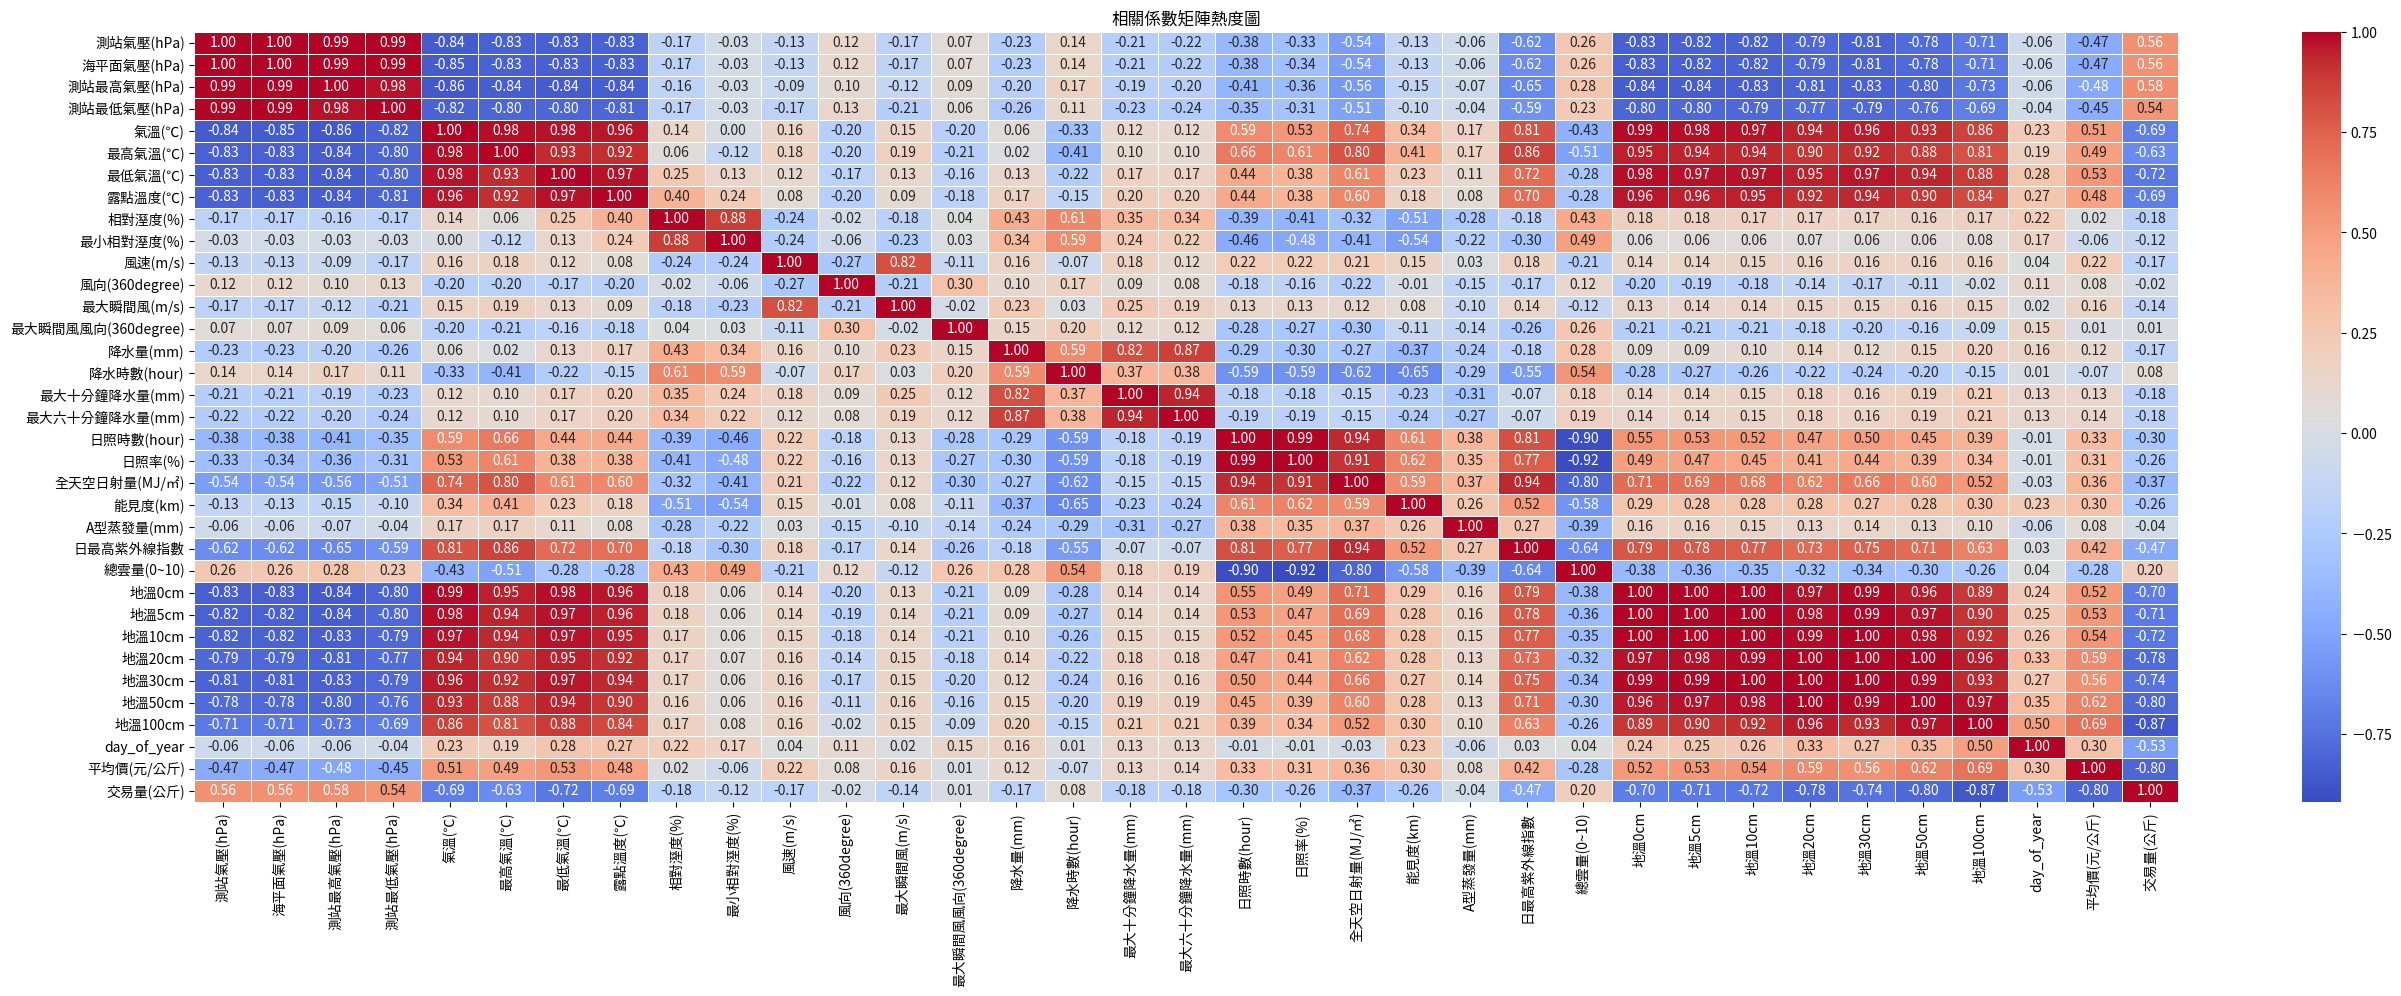

In [165]:
#plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定使用的中文字型
	
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

# 計算相關係數矩陣
correlation_matrix = merged1.corr()

# 使用 Seaborn 繪製熱度圖
plt.figure(figsize=(32, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 設定圖表標題
plt.title("相關係數矩陣熱度圖")

# 顯示圖表
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4532\3544117301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y='相關係數', data=correlation_df, palette='coolwarm')


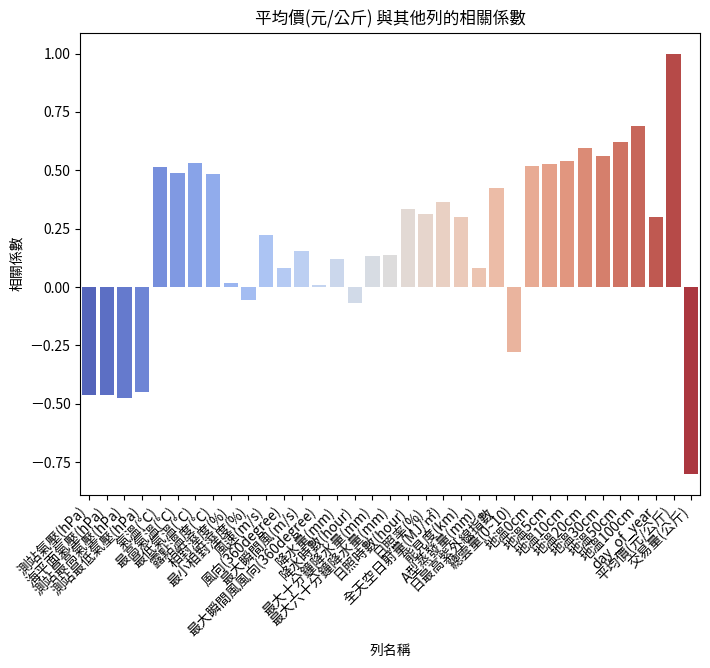

In [166]:
target_column = '平均價(元/公斤)'

# 計算目標列與其他列的相關係數
correlations = merged1.corrwith(merged1[target_column])

# 將相關係數存儲為 DataFrame
correlation_df = pd.DataFrame({'相關係數': correlations})

# 繪製圖表
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_df.index, y='相關係數', data=correlation_df, palette='coolwarm')
plt.title(f'{target_column} 與其他列的相關係數')
plt.xlabel('列名稱')
plt.ylabel('相關係數')
plt.xticks(rotation=45, ha='right')  # 調整 x 軸標籤角度
plt.show()

In [167]:
target_column = '平均價(元/公斤)'

# 計算目標列與其他列的相關係數
correlations = merged1.corrwith(merged1[target_column])

# 找出相關係數絕對值在 0.3 之外的列
selected_columns = correlations[abs(correlations) > 0.35].index

# 篩選 DataFrame
filtered_df = merged1[selected_columns]

# 輸出篩選後的 DataFrame
filtered_df.head()

,測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最低氣壓(hPa),氣溫(℃),最高氣溫(℃),最低氣溫(℃),露點溫度(℃),全天空日射量(MJ/㎡),日最高紫外線指數,地溫0cm,地溫5cm,地溫10cm,地溫20cm,地溫30cm,地溫50cm,地溫100cm,平均價(元/公斤),交易量(公斤)
0,1024.6,1025.6,1027.3,1022.0,12.3,14.7,9.9,7.4,4.52,3,12.8,13.6,14.1,16.0,14.9,16.9,19.8,27.2,189266
1,1023.6,1024.6,1025.0,1022.4,13.1,13.7,12.5,11.4,1.78,1,13.7,14.4,14.7,16.0,15.2,16.6,19.4,25.1,210707
2,1022.1,1023.1,1024.2,1020.0,16.4,20.3,13.6,14.1,7.54,4,15.5,15.8,15.8,16.2,15.8,16.6,19.2,27.9,161135
3,1019.6,1020.6,1022.0,1016.7,17.6,20.9,15.0,15.4,4.65,3,17.5,17.9,17.9,17.9,17.8,17.6,19.0,23.7,225537
4,1020.1,1021.1,1022.8,1017.2,14.6,15.3,14.0,13.9,2.27,1,15.9,16.5,16.9,17.7,17.2,17.6,19.0,26.3,177858


In [168]:
filtered_pred = merged2[selected_columns]

In [169]:
print(filtered_df.columns)
print(filtered_pred.columns)

Index(['測站氣壓(hPa)', '海平面氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)', '氣溫(℃)',
       '最高氣溫(℃)', '最低氣溫(℃)', '露點溫度(℃)', '全天空日射量(MJ/㎡)', '日最高紫外線指數', '地溫0cm',
       '地溫5cm', '地溫10cm', '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm', '平均價(元/公斤)',
       '交易量(公斤)'],
      dtype='object')
Index(['測站氣壓(hPa)', '海平面氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)', '氣溫(℃)',
       '最高氣溫(℃)', '最低氣溫(℃)', '露點溫度(℃)', '全天空日射量(MJ/㎡)', '日最高紫外線指數', '地溫0cm',
       '地溫5cm', '地溫10cm', '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm', '平均價(元/公斤)',
       '交易量(公斤)'],
      dtype='object')


In [170]:
reduce_features = ['海平面氣壓(hPa)','測站最低氣壓(hPa)', '測站最高氣壓(hPa)','最高氣溫(℃)', '最低氣溫(℃)', '露點溫度(℃)','全天空日射量(MJ/㎡)', '日最高紫外線指數', '地溫0cm',
       '地溫5cm', '地溫10cm', '地溫20cm', '地溫30cm', '地溫50cm', '地溫100cm']

filtered_df.drop(labels=reduce_features,axis='columns',inplace=True)
filtered_pred.drop(labels=reduce_features,axis='columns',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4532\3935455614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(labels=reduce_features,axis='columns',inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4532\3935455614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pred.drop(labels=reduce_features,axis='columns',inplace=True)


In [171]:
print(filtered_df.shape)
print(filtered_pred.shape)

(295, 4)
(294, 4)


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [173]:
target_column = '平均價(元/公斤)'

# 選擇特徵和目標變數
X = filtered_df.drop(target_column, axis=1)  # 特徵
y = filtered_df[target_column]  # 目標變數

X_test = filtered_pred.drop(target_column,axis=1)
y_test = filtered_pred[target_column]

print(len(X_test))
print(len(y_test))
# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X, y)

# 進行預測
y_pred = model.predict(X_test)

# 計算均方誤差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

294
294
Mean Squared Error: 48.619550572378095


In [174]:
# 假設 y_true 是實際的目標變數，y_pred 是模型的預測結果
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # 使用 squared=False 得到 RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 48.619550572378095
Root Mean Squared Error (RMSE): 6.97277208665091
Mean Absolute Error (MAE): 5.829985877268709
R-squared (R2): 0.5004535234601326


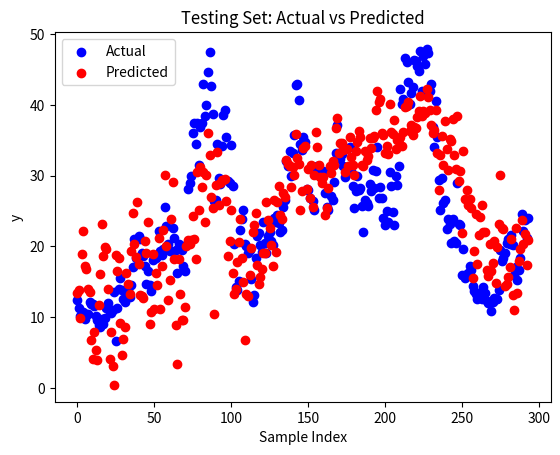

13.412347018295463
12.4
13.893606947460796
11.3
9.828428665796082
10.2
18.920741205109664
10.3
22.127533887903894
10.7
17.16917537824503
9.8
16.822841340080686
10.5
13.949194722345908
10.5
13.541262367126365
12.1
6.7977358365978375
11.9
4.090605773703999
11.8
7.953791034596009
11.6
5.427589311465454
10.2
3.9395038850840933
9.6
11.670641235479081
8.9
16.037219527226398
8.6
23.10542226521204
9.8
18.655890986306304
9.1
19.882284361232053
9.9
19.618886124955168
11.3
14.033796895525995
12.0
4.047928055574687
10.7
7.91033978021153
10.6
3.1087414689873185
11.0
0.42651718033454245
13.5
18.776904109061718
6.6
16.47772781761404
11.3
18.297727488741145
14.0
9.1696984477245
15.5
4.589524030283144
13.8
6.8731464548076815
12.5
8.564576883603706
12.2
16.239893884183857
13.0
14.65343974335309
13.8
13.263712815880751
12.8
19.278483162732414
14.5
24.765559820075907
17.1
20.350752433481205
21.1
18.489116253282816
18.4
26.204708579613282
21.0
17.49385899933509
21.4
13.16733708315627
21.1
12.97170196078019

In [175]:
import matplotlib.pyplot as plt

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# 可視化測試集的預測結果
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('y')
plt.legend()
plt.show()

for true_value, predicted_value in zip(y_test, y_pred):
    print(predicted_value)
    print(true_value)